## Importing Libraries

In [1]:
import sys
!"{sys.executable}" -m pip install tensorflow pandas numpy scikit-learn seaborn matplotlib wordcloud spacy nltk contractions


In [2]:
pip install "pydantic<2"

     ---------------------------------------- 0.0/155.3 kB ? eta -:--:--
     -- ------------------------------------- 10.2/155.3 kB ? eta -:--:--
     ------- ----------------------------- 30.7/155.3 kB 262.6 kB/s eta 0:00:01
     -------------- ---------------------- 61.4/155.3 kB 409.6 kB/s eta 0:00:01
     -------------------------- --------- 112.6/155.3 kB 595.3 kB/s eta 0:00:01
     ------------------------------------ 155.3/155.3 kB 714.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -- ------------------------------------- 0.2/2.2 MB 3.1 MB/s eta 0:00:01
   ------- -------------------------------- 0.4/2.2 MB 4.3 MB/s eta 0:00:01
   ----------- ---------------------------- 0.6/2.2 MB 4.3 MB/s eta 0:00:01
   -------------- ------------------------- 0.8/2.2 MB 4.3 MB/s eta 0:00:01
   -------------------- ------------------- 1.1/2.2 MB 4.8 MB/s eta 0:00:01
   ------------------------- -------------- 1.4/2.2 MB 4.8 MB/s eta 0:00:01
   -----

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM, Bidirectional, Conv1D, MaxPooling1D, Dropout, GlobalMaxPooling1D
from tensorflow.keras.regularizers import l2
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import os
import datetime
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import contractions
import string
import spacy
from wordcloud import WordCloud
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import textwrap
import pickle

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to C:\Users\Sandra
[nltk_data]     Tang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sandra
[nltk_data]     Tang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sandra
[nltk_data]     Tang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Sandra
[nltk_data]     Tang\AppData\Roaming\nltk_data...


True

## Load Dataset 

In [4]:
df = pd.read_csv("C:/Users/Sandra Tang/Emotion Detection Text Sentiment Analysis/emotionDataset.csv")

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB
None


In [6]:
# Display the first few rows
print("First 5 rows:")
display(df.head())

First 5 rows:


,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [7]:
# Check dataset shape
print(f"Dataset shape: {df.shape}")

Dataset shape: (34792, 2)


In [8]:
# Check class distribution
print("\nEmotion distribution:")
display(df['Emotion'].value_counts())


Emotion distribution:


Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

In [9]:
# Visualize class distribution
emotion_colors = {
    "neutral": "#A9A9A9",  
    "joy": "#FFFACD",     
    "sadness": "#1E90FF", 
    "fear": "#8A2BE2",     
    "surprise": "#FFA500",  
    "anger": "#DC143C",     
    "shame": "#8B4513",     
    "disgust": "#228B22"    
}

C:\Users\Sandra Tang\AppData\Local\Temp\ipykernel_11060\1383751405.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Emotion", data=df, palette=palette)


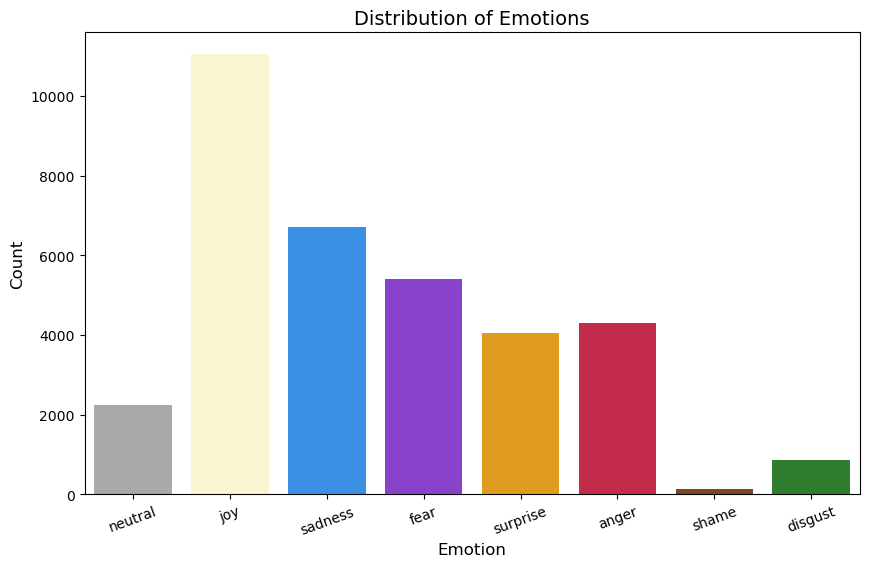

In [10]:
# Plot emotion distribution
plt.figure(figsize=(10, 6))
palette = [emotion_colors[emotion] for emotion in df["Emotion"].unique()]
sns.countplot(x="Emotion", data=df, palette=palette)
plt.title("Distribution of Emotions", fontsize=14)
plt.xlabel("Emotion", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=20) 
plt.show()

## Preprocess the Dataset

### Check column names 

In [11]:
print(df.columns)

Index(['Emotion', 'Text'], dtype='object')


In [12]:
# Define improved text preprocessing function
def advanced_text_preprocessing(text):
    """
    Comprehensive text preprocessing function
    """
    # Handle empty texts
    if pd.isna(text) or text == "":
        return ""
        
    # Convert to lowercase
    text = str(text).lower()
    
    # Expand contractions (e.g., "don't" -> "do not")
    try:
        text = contractions.fix(text)
    except:
        pass  # If contractions package fails, continue with original text
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove emojis and special characters
    text = text.encode('ascii', 'ignore').decode('ascii')
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and short words
    stop_words = set(stopwords.words('english'))
    
    # Add custom emotion-related words to keep (don't remove these stopwords)
    emotion_stopwords = {'not', 'no', 'never', 'nor', 'neither', 'hardly', 'seldom', 'rarely'}
    stop_words = stop_words - emotion_stopwords
    
    tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a string
    processed_text = ' '.join(tokens)
    
    return processed_text

In [13]:
# Apply advanced text preprocessing
df['processed_text'] = df['Text'].apply(advanced_text_preprocessing)

In [14]:
# Display original and processed text for comparison
comparison_df = pd.DataFrame({
    'Original Text': df['Text'].head(5),
    'Processed Text': df['processed_text'].head(5)
})
display(comparison_df)

,Original Text,Processed Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,sage act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,way homegirl baby funeral man hate funeral rea...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant regular featur...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,iluvmiasantos ugh babe hugggzzz babe naamazed ...


## Extract Additional Text Features

In [15]:
# Function to extract additional features from text
def extract_text_features(text):
    """
    Extract additional features from text like:
    - Text length
    - Word count
    - Avg word length
    - Punctuation count
    - Uppercase word count
    """
    features = {}
    
    # Handle empty texts
    if pd.isna(text) or text == "":
        return {
            'text_length': 0,
            'word_count': 0,
            'avg_word_length': 0,
            'punctuation_count': 0,
            'uppercase_word_count': 0,
            'emoji_count': 0
        }
    
    # Original text for these features (before preprocessing)
    features['text_length'] = len(text)
    features['word_count'] = len(text.split())
    
    # Average word length
    words = text.split()
    if words:
        features['avg_word_length'] = sum(len(word) for word in words) / len(words)
    else:
        features['avg_word_length'] = 0
    
    # Punctuation count
    features['punctuation_count'] = sum(1 for char in text if char in string.punctuation)
    
    # Uppercase word count (might indicate shouting/emphasis)
    features['uppercase_word_count'] = sum(1 for word in words if word.isupper())
    
    # Emoji count (simplified)
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    features['emoji_count'] = len(emoji_pattern.findall(text))
    
    return features

In [16]:
# Extract features and add to dataframe
features_df = pd.DataFrame(df['Text'].apply(extract_text_features).tolist())
df = pd.concat([df, features_df], axis=1)

In [17]:
# Display the dataframe with new features
display(df.head())

,Emotion,Text,processed_text,text_length,word_count,avg_word_length,punctuation_count,uppercase_word_count,emoji_count
0,neutral,Why ?,,7,2,2.000000,1,0,0
1,joy,Sage Act upgrade on my to do list for tommorow.,sage act upgrade list tommorow,47,10,3.800000,1,0,0
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,way homegirl baby funeral man hate funeral rea...,100,20,4.000000,3,20,0
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant regular featur...,478,102,3.676471,22,0,0
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,iluvmiasantos ugh babe hugggzzz babe naamazed ...,121,22,4.454545,7,0,0


## Tokenization and Sequence Padding

In [18]:
# Tokenize the processed text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['processed_text'].tolist())
sequences = tokenizer.texts_to_sequences(df['processed_text'].tolist())
max_len = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_len)

print(f"Vocabulary size: {len(tokenizer.word_index) + 1}")
print(f"Maximum sequence length: {max_len}")
print(f"Padded sequences shape: {padded_sequences.shape}")

Vocabulary size: 37899
Maximum sequence length: 97
Padded sequences shape: (34792, 97)


## Label Encoding and Train-Test Split

In [19]:
# Encode the emotion labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['Emotion'])
one_hot = tf.keras.utils.to_categorical(labels)

print(f"Number of classes: {len(label_encoder.classes_)}")
print(f"Class names: {label_encoder.classes_}")
print(f"One-hot encoded labels shape: {one_hot.shape}")

Number of classes: 8
Class names: ['anger' 'disgust' 'fear' 'joy' 'neutral' 'sadness' 'shame' 'surprise']
One-hot encoded labels shape: (34792, 8)


In [20]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, one_hot, test_size=0.2, random_state=42)

print(f"Training set features shape: {x_train.shape}")
print(f"Testing set features shape: {x_test.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Testing set target shape: {y_test.shape}")

Training set features shape: (27833, 97)
Testing set features shape: (6959, 97)
Training set target shape: (27833, 8)
Testing set target shape: (6959, 8)


## Model Architectures

In [21]:
# Define a function to create a Bidirectional LSTM model
def create_bidirectional_lstm_model(vocab_size, embedding_dim, input_length, num_classes):
    model = Sequential()
    
    # Embedding layer
    model.add(Embedding(input_dim=vocab_size, 
                        output_dim=embedding_dim, 
                        input_length=input_length))
    
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))
    
    # Bidirectional LSTM layer
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Dropout(0.2))
    
    # Another Bidirectional LSTM layer
    model.add(Bidirectional(LSTM(64)))
    model.add(Dropout(0.2))
    
    # Dense layers with regularization
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile the model with a lower learning rate
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [22]:
# Define a function to create a CNN model
def create_cnn_model(vocab_size, embedding_dim, input_length, num_classes):
    model = Sequential()
    
    # Embedding layer
    model.add(Embedding(input_dim=vocab_size, 
                        output_dim=embedding_dim, 
                        input_length=input_length))
    
    # Convolutional layers
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.2))
    
    # Dense layers
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile the model
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [23]:
# Create model instances for demonstration
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 200
input_length = max_len
num_classes = len(one_hot[0])

lstm_model = create_bidirectional_lstm_model(vocab_size, embedding_dim, input_length, num_classes)
cnn_model = create_cnn_model(vocab_size, embedding_dim, input_length, num_classes)

C:\Users\Sandra Tang\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [24]:
# Display model summaries
print("Bidirectional LSTM Model Summary:")
lstm_model.summary()

print("\nCNN Model Summary:")
cnn_model.summary()

Bidirectional LSTM Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


CNN Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Training Function with Cross-Validation

In [25]:
# Define function for training with cross-validation
def train_with_cross_validation(create_model_func, X, y, n_splits=5, epochs=50, batch_size=32):
    """
    Train a model using cross-validation
    
    Args:
        create_model_func: Function that creates and returns a compiled model
        X: Features (padded sequences)
        y: Target (one-hot encoded labels)
        n_splits: Number of cross-validation folds
        epochs: Maximum number of epochs per fold
        batch_size: Batch size for training
        
    Returns:
        List of trained models, one per fold
        Average evaluation metrics across folds
    """
    # Setup K-Fold cross-validation
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Convert one-hot encoded y back to class indices for stratification
    y_indices = np.argmax(y, axis=1)
    
    fold_no = 1
    models = []
    histories = []
    fold_metrics = []
    
    # Create directory for saving models
    model_dir = "emotion_models"
    os.makedirs(model_dir, exist_ok=True)
    
    for train_idx, val_idx in kfold.split(X, y_indices):
        print(f'\nTraining for fold {fold_no}')
        
        # Split data
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # Create fresh model
        model = create_model_func()
        
        # Setup callbacks for this fold
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True,
            verbose=1
        )
        
        reduce_lr = ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=3,
            min_lr=1e-6,
            verbose=1
        )
        
        model_checkpoint = ModelCheckpoint(
            f"{model_dir}/model_fold_{fold_no}.keras",
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
        
        # Create log directory for TensorBoard
        log_dir = f"logs/fit/{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}_fold_{fold_no}"
        tensorboard_callback = TensorBoard(
            log_dir=log_dir,
            histogram_freq=1,
            write_graph=True
        )
        
        # Train the model
        history = model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_val, y_val),
            callbacks=[early_stopping, reduce_lr, model_checkpoint, tensorboard_callback],
            verbose=1
        )
        
        # Evaluate on validation set
        val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
        
        # Save metrics
        fold_metrics.append({
            'fold': fold_no,
            'val_loss': val_loss,
            'val_accuracy': val_accuracy
        })
        
        # Store model and history
        models.append(model)
        histories.append(history)
        
        fold_no += 1
    
    # Compute average metrics
    avg_val_loss = np.mean([metrics['val_loss'] for metrics in fold_metrics])
    avg_val_accuracy = np.mean([metrics['val_accuracy'] for metrics in fold_metrics])
    
    print(f"\nAverage validation loss: {avg_val_loss:.4f}")
    print(f"Average validation accuracy: {avg_val_accuracy:.4f}")
    
    # Create a dataframe with fold metrics
    fold_metrics_df = pd.DataFrame(fold_metrics)
    
    return models, histories, fold_metrics_df

## Train the Model


Training for fold 1


C:\Users\Sandra Tang\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.3804 - loss: 2.0176
Epoch 1: val_loss improved from inf to 1.23853, saving model to emotion_models/model_fold_1.keras
725/725 ━━━━━━━━━━━━━━━━━━━━ 177s 227ms/step - accuracy: 0.3805 - loss: 2.0171 - val_accuracy: 0.5882 - val_loss: 1.2385 - learning_rate: 0.0010
Epoch 2/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.6926 - loss: 0.9979
Epoch 2: val_loss improved from 1.23853 to 1.17032, saving model to emotion_models/model_fold_1.keras
725/725 ━━━━━━━━━━━━━━━━━━━━ 206s 283ms/step - accuracy: 0.6926 - loss: 0.9979 - val_accuracy: 0.6157 - val_loss: 1.1703 - learning_rate: 0.0010
Epoch 3/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.8090 - loss: 0.6582
Epoch 3: val_loss did not improve from 1.17032
725/725 ━━━━━━━━━━━━━━━━━━━━ 163s 224ms/step - accuracy: 0.8090 - loss: 0.6583 - val_accuracy: 0.6135 - val_loss: 1.2595 - learning_rate: 0.0010
Epoch 4/10
725/725 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step 

,fold,val_loss,val_accuracy
0,1,1.170320,0.615710
1,2,1.206480,0.598431
2,3,1.169174,0.614987


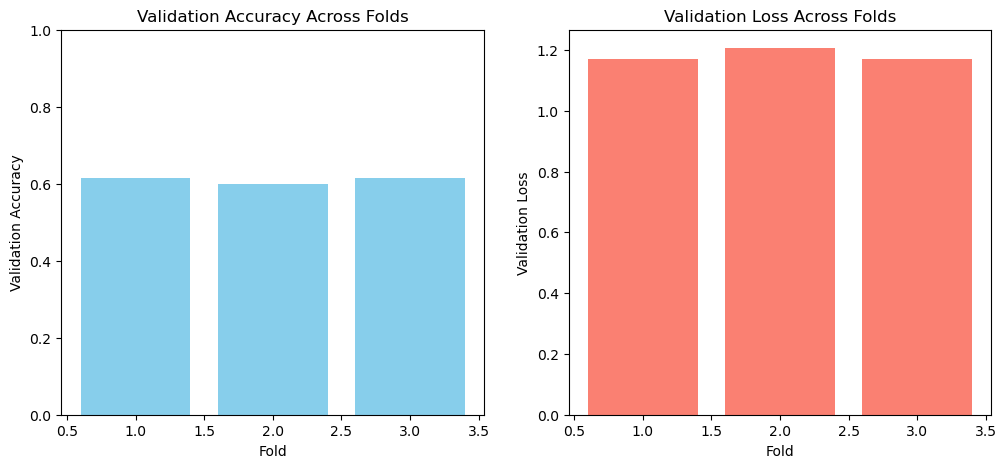

Selected model from fold 3.0 with validation loss 1.1692


In [26]:
# Define model creation function for cross-validation
def create_model():
    return create_bidirectional_lstm_model(vocab_size, embedding_dim, input_length, num_classes)
    # Alternative: return create_cnn_model(vocab_size, embedding_dim, input_length, num_classes)

# Train with cross-validation (reduce epochs for demonstration)
models, histories, fold_metrics_df = train_with_cross_validation(
    create_model, 
    padded_sequences, 
    one_hot, 
    n_splits=3,  # Use smaller value for demonstration
    epochs=10,   # Use smaller value for demonstration
    batch_size=32
)

# Display cross-validation results
display(fold_metrics_df)

# Plot metrics across folds
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(fold_metrics_df['fold'], fold_metrics_df['val_accuracy'], color='skyblue')
plt.title('Validation Accuracy Across Folds')
plt.xlabel('Fold')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
plt.bar(fold_metrics_df['fold'], fold_metrics_df['val_loss'], color='salmon')
plt.title('Validation Loss Across Folds')
plt.xlabel('Fold')
plt.ylabel('Validation Loss')
plt.show()

# Select best model (lowest validation loss)
best_model_idx = fold_metrics_df['val_loss'].argmin()
best_model = models[best_model_idx]
print(f"Selected model from fold {fold_metrics_df.iloc[best_model_idx]['fold']} with validation loss {fold_metrics_df.iloc[best_model_idx]['val_loss']:.4f}")

## Comprehensive Evaluation Function

In [27]:
# Define function for comprehensive evaluation
def comprehensive_evaluation(model, X_test, y_test, label_encoder):
    """
    Perform a comprehensive evaluation of the model
    
    Args:
        model: Trained model
        X_test: Test features
        y_test: Test labels (one-hot encoded)
        label_encoder: LabelEncoder used to transform class labels
        
    Returns:
        Dictionary with evaluation metrics
    """
    # Convert one-hot encoded y_test to class indices
    y_true = np.argmax(y_test, axis=1)
    
    # Get predictions
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    
    # Get class names
    class_names = label_encoder.classes_
    
    # Calculate metrics
    accuracy = np.mean(y_pred == y_true)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    
    # Classification report
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Normalize confusion matrix
    conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    
    # Create evaluation results dictionary
    eval_results = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'classification_report': report,
        'confusion_matrix': conf_matrix,
        'confusion_matrix_norm': conf_matrix_norm,
        'y_true': y_true,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'class_names': class_names
    }
    
    return eval_results

In [28]:
# Define function to visualize evaluation results
def visualize_evaluation_results(eval_results):
    """
    Visualize evaluation results with nice plots
    
    Args:
        eval_results: Dictionary from comprehensive_evaluation function
    """
    # Extract necessary data
    conf_matrix = eval_results['confusion_matrix']
    conf_matrix_norm = eval_results['confusion_matrix_norm']
    class_names = eval_results['class_names']
    report = eval_results['classification_report']
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    
    # 1. Regular confusion matrix
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=class_names,
        yticklabels=class_names,
        ax=axes[0, 0]
    )
    axes[0, 0].set_title('Confusion Matrix', fontsize=16)
    axes[0, 0].set_xlabel('Predicted Label', fontsize=12)
    axes[0, 0].set_ylabel('True Label', fontsize=12)
    
    # 2. Normalized confusion matrix
    sns.heatmap(
        conf_matrix_norm,
        annot=True,
        fmt='.2f',
        cmap='Blues',
        xticklabels=class_names,
        yticklabels=class_names,
        ax=axes[0, 1]
    )
    axes[0, 1].set_title('Normalized Confusion Matrix', fontsize=16)
    axes[0, 1].set_xlabel('Predicted Label', fontsize=12)
    axes[0, 1].set_ylabel('True Label', fontsize=12)
    
    # 3. Per-class metrics
    per_class_metrics = pd.DataFrame({
        'Precision': [report[cls]['precision'] for cls in class_names],
        'Recall': [report[cls]['recall'] for cls in class_names],
        'F1-Score': [report[cls]['f1-score'] for cls in class_names],
        'Support': [report[cls]['support'] for cls in class_names]
    }, index=class_names)
    
    sns.heatmap(
        per_class_metrics[['Precision', 'Recall', 'F1-Score']],
        annot=True,
        fmt='.2f',
        cmap='Greens',
        ax=axes[1, 0]
    )
    axes[1, 0].set_title('Per-Class Metrics', fontsize=16)
    axes[1, 0].set_xlabel('Metric', fontsize=12)
    axes[1, 0].set_ylabel('Class', fontsize=12)
    
    # 4. Support bar chart
    support = [report[cls]['support'] for cls in class_names]
    axes[1, 1].bar(class_names, support, color='skyblue')
    axes[1, 1].set_title('Class Distribution in Test Set', fontsize=16)
    axes[1, 1].set_xlabel('Class', fontsize=12)
    axes[1, 1].set_ylabel('Count', fontsize=12)
    axes[1, 1].set_xticklabels(class_names, rotation=45, ha='right')
    
    # Add overall metrics as text
    overall_metrics = (
        f"Accuracy: {eval_results['accuracy']:.4f}\n"
        f"Precision: {eval_results['precision']:.4f}\n"
        f"Recall: {eval_results['recall']:.4f}\n"
        f"F1 Score: {eval_results['f1']:.4f}"
    )
    
    plt.figtext(0.5, 0.01, overall_metrics, ha='center', fontsize=14, 
                bbox=dict(facecolor='lightblue', alpha=0.5))
    
    # Adjust layout and show plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.suptitle('Emotion Detection Model Evaluation', fontsize=20)
    plt.show()

## Evaluate the Model

218/218 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step


C:\Users\Sandra Tang\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sandra Tang\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sandra Tang\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sandra Tang\a

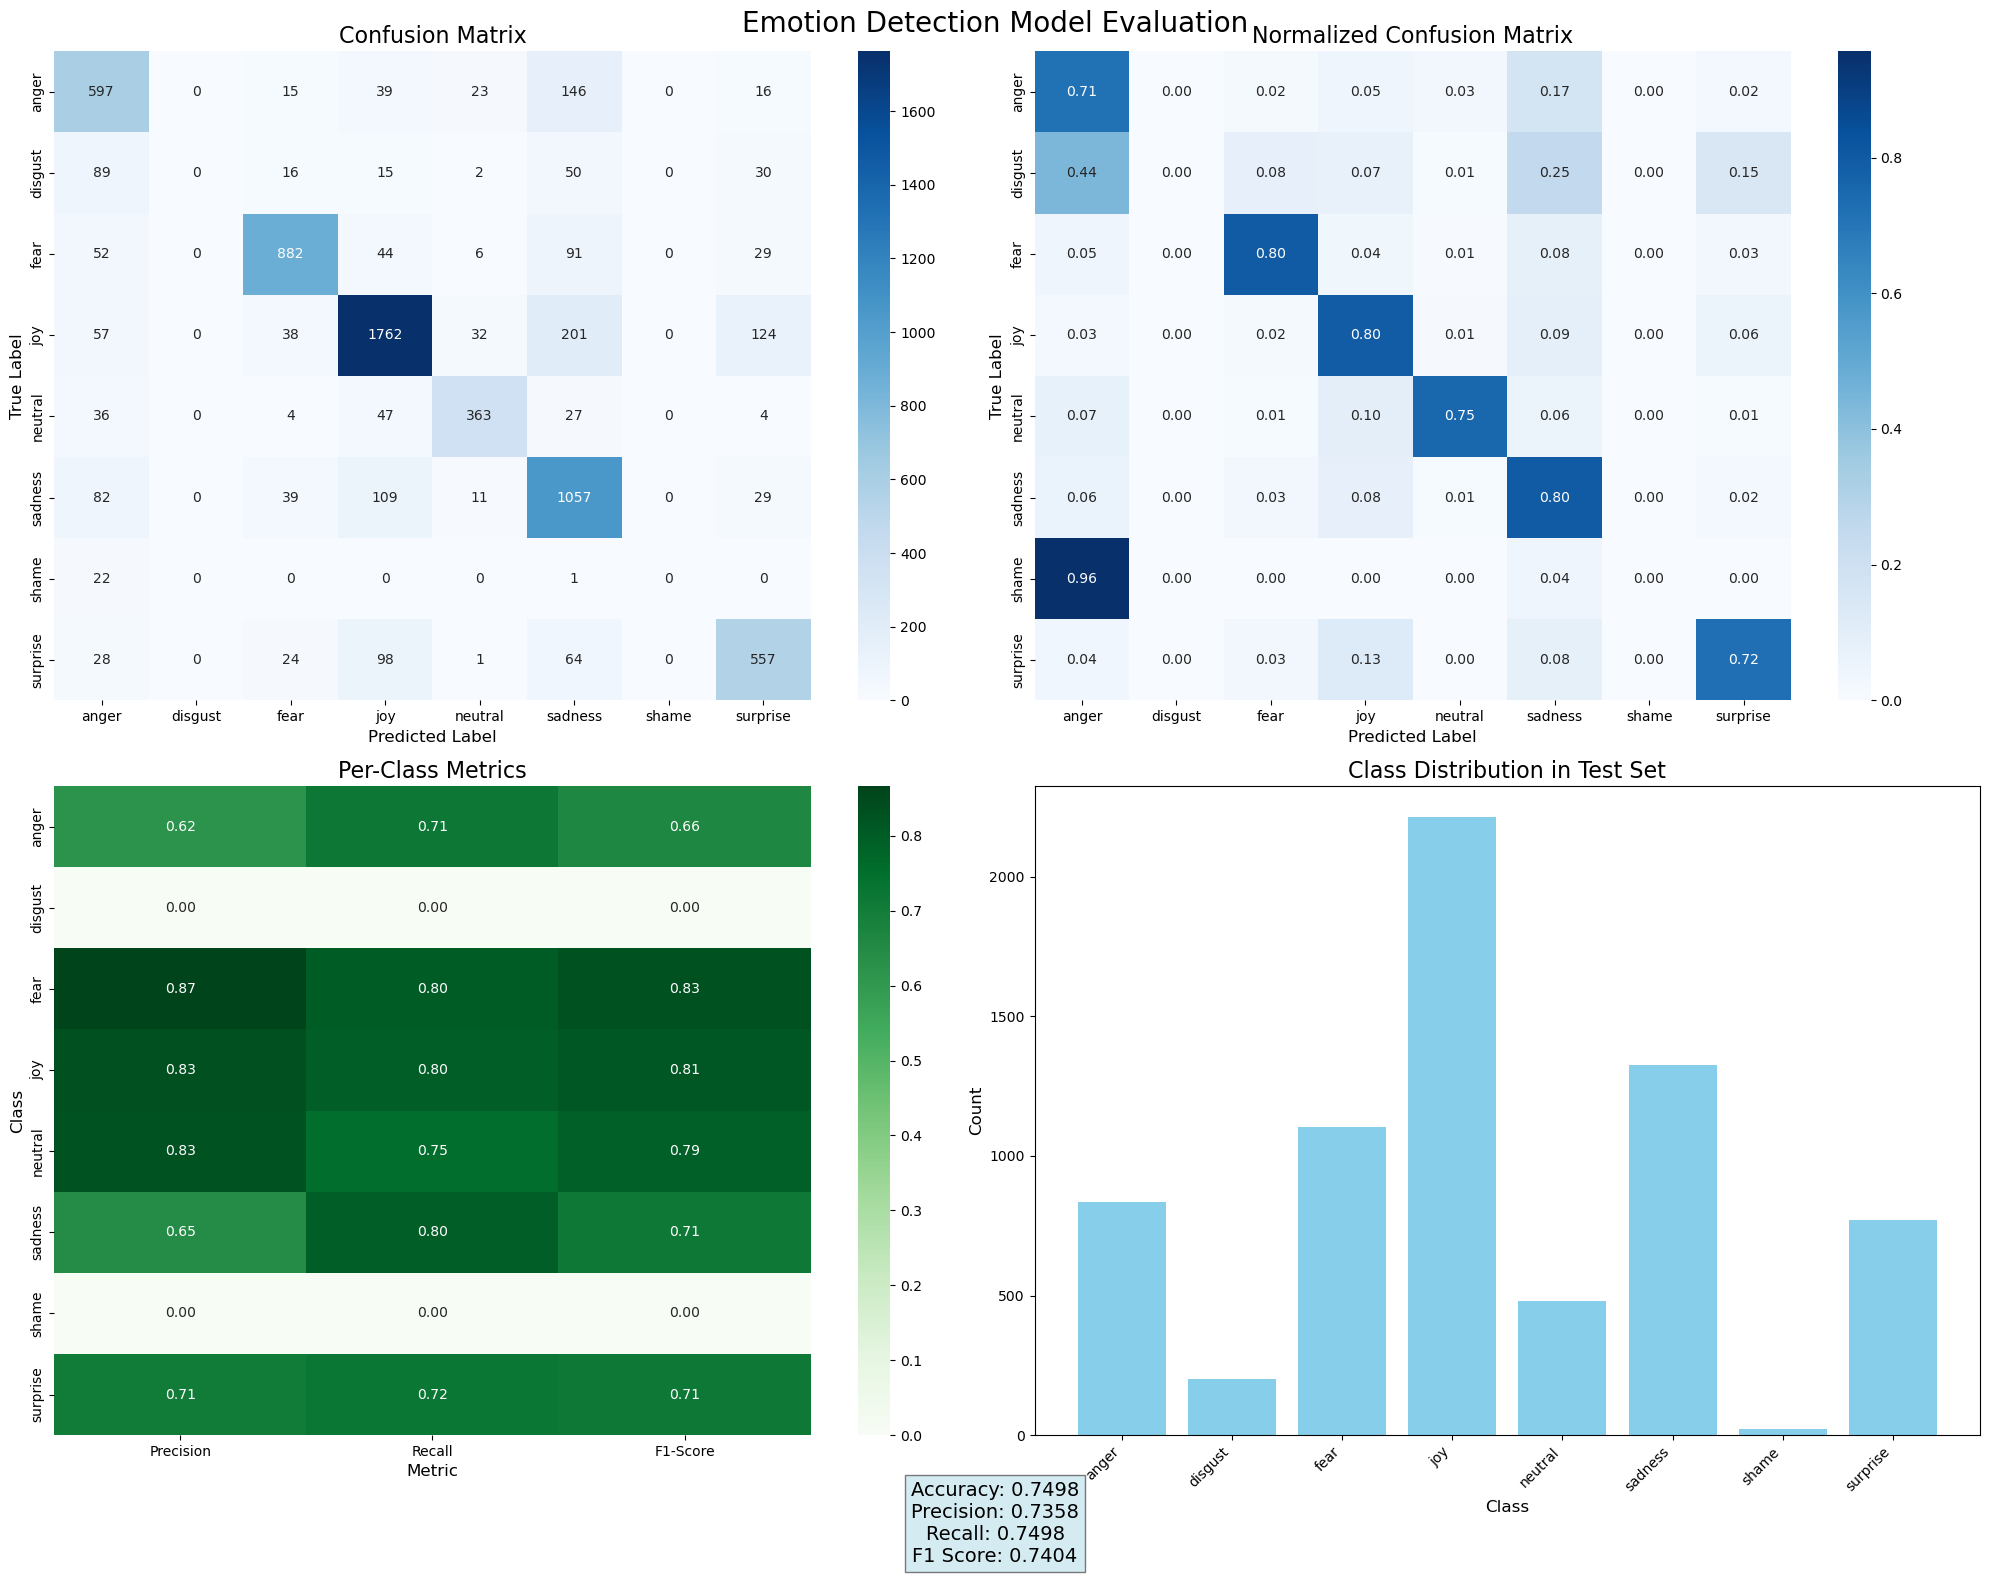

In [29]:
trained_model = best_model
# Perform comprehensive evaluation
from sklearn.metrics import precision_recall_fscore_support
eval_results = comprehensive_evaluation(trained_model, x_test, y_test, label_encoder)

# Visualize results
visualize_evaluation_results(eval_results)

## Emotion Analysis 

In [30]:
# Define the EmotionAnalyzer class
class EmotionAnalyzer:
    def __init__(self, model, tokenizer, max_len, label_encoder, preprocessing_func=None):
        """
        Initialize the Emotion Analyzer
        
        Args:
            model: Trained emotion detection model
            tokenizer: Text tokenizer used during training
            max_len: Maximum sequence length
            label_encoder: Label encoder for emotion classes
            preprocessing_func: Text preprocessing function (optional)
        """
        self.model = model
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.label_encoder = label_encoder
        self.preprocessing_func = preprocessing_func
        self.sia = SentimentIntensityAnalyzer()
        
        # Load spaCy model if not already loaded
        try:
            self.nlp = spacy.load("en_core_web_sm")
        except:
            import subprocess
            subprocess.run(["python", "-m", "spacy", "download", "en_core_web_sm"])
            self.nlp = spacy.load("en_core_web_sm")
        
    def _preprocess_text(self, text):
        """Preprocess text before prediction"""
        if self.preprocessing_func:
            return self.preprocessing_func(text)
        return text
    
    def predict_emotion(self, text):
        """
        Predict the emotion of the given text
        
        Args:
            text: Input text
            
        Returns:
            Dictionary with prediction results
        """
        # Preprocess the text
        processed_text = self._preprocess_text(text)
        
        # Tokenize and pad
        sequence = self.tokenizer.texts_to_sequences([processed_text])
        padded_sequence = tf.keras.preprocessing.sequence.pad_sequences(
            sequence, maxlen=self.max_len)
        
        # Get prediction probabilities
        prediction = self.model.predict(padded_sequence)[0]
        
        # Get the predicted class index and label
        predicted_idx = np.argmax(prediction)
        predicted_label = self.label_encoder.inverse_transform([predicted_idx])[0]
        
        # Get all emotion probabilities
        emotions = {}
        for i, emotion in enumerate(self.label_encoder.classes_):
            emotions[emotion] = float(prediction[i])
        
        # Additional sentiment analysis using VADER
        sentiment = self.sia.polarity_scores(text)
        
        return {
            'text': text,
            'predicted_emotion': predicted_label,
            'confidence': float(prediction[predicted_idx]),
            'emotion_probabilities': emotions,
            'sentiment_vader': sentiment
        }
    
    def analyze_text(self, text):
        """
        Perform deeper analysis of the text
        
        Args:
            text: Input text
            
        Returns:
            Dictionary with analysis results
        """
        # Basic emotion prediction
        prediction = self.predict_emotion(text)
        
        # Parse text with spaCy for additional analysis
        doc = self.nlp(text)
        
        # Extract named entities
        entities = [{'text': ent.text, 'label': ent.label_} for ent in doc.ents]
        
        # Extract key phrases (noun chunks)
        key_phrases = [chunk.text for chunk in doc.noun_chunks]
        
        # Extract keywords (nouns, verbs, adjectives with high importance)
        keywords = [token.text for token in doc if token.pos_ in ('NOUN', 'VERB', 'ADJ') 
                   and not token.is_stop and token.has_vector]
        
        # Calculate word importance based on dependency parsing
        word_importance = {}
        for token in doc:
            # Higher importance for root and direct children of root
            if token.dep_ == 'ROOT':
                word_importance[token.text] = 3
            elif token.head.dep_ == 'ROOT':
                word_importance[token.text] = 2
            else:
                word_importance[token.text] = 1
                
        # Add all analyses to the result
        prediction.update({
            'entities': entities,
            'key_phrases': key_phrases,
            'keywords': keywords,
            'word_importance': word_importance
        })
        
        return prediction
    
    def batch_predict(self, texts):
        """
        Predict emotions for a batch of texts
        
        Args:
            texts: List of input texts
            
        Returns:
            DataFrame with prediction results
        """
        results = []
        for text in texts:
            results.append(self.predict_emotion(text))
        
        return pd.DataFrame(results)
    
    def visualize_prediction(self, text):
        """
        Create visualizations for the emotion prediction
        
        Args:
            text: Input text
        """
        # Get prediction
        prediction = self.predict_emotion(text)
        
        # Create figure with subplots
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # 1. Emotion probability bar chart
        emotions = prediction['emotion_probabilities']
        sorted_emotions = sorted(emotions.items(), key=lambda x: x[1], reverse=True)
        emotion_names = [e[0] for e in sorted_emotions]
        emotion_probs = [e[1] for e in sorted_emotions]
        
        # Create color palette based on emotion values
        emotion_colors = {
            "neutral": "#A9A9A9",
            "joy": "#FFFACD",
            "sadness": "#1E90FF",
            "fear": "#8A2BE2",
            "surprise": "#FFA500",
            "anger": "#DC143C",
            "shame": "#8B4513",
            "disgust": "#228B22"
        }
        
        # Get colors in the same order as emotions
        colors = [emotion_colors.get(e, "#333333") for e in emotion_names]
        
        axes[0, 0].bar(emotion_names, emotion_probs, color=colors)
        axes[0, 0].set_title('Emotion Probabilities', fontsize=14)
        axes[0, 0].set_ylabel('Probability', fontsize=12)
        axes[0, 0].set_ylim(0, 1)
        axes[0, 0].set_xticklabels(emotion_names, rotation=45, ha='right')
        
        # Highlight the predicted emotion
        predicted_idx = emotion_names.index(prediction['predicted_emotion'])
        axes[0, 0].get_children()[predicted_idx].set_edgecolor('black')
        axes[0, 0].get_children()[predicted_idx].set_linewidth(2)
        
        # 2. VADER sentiment analysis
        sentiment = prediction['sentiment_vader']
        sentiment_labels = ['Negative', 'Neutral', 'Positive', 'Compound']
        sentiment_values = [sentiment['neg'], sentiment['neu'], sentiment['pos'], sentiment['compound']]
        sentiment_colors = ['#DC143C', '#A9A9A9', '#228B22', '#1E90FF']
        
        axes[0, 1].bar(sentiment_labels, sentiment_values, color=sentiment_colors)
        axes[0, 1].set_title('Sentiment Analysis (VADER)', fontsize=14)
        axes[0, 1].set_ylabel('Score', fontsize=12)
        axes[0, 1].set_ylim(-1, 1)
        axes[0, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
        
        # 3. Word cloud based on word importance
        analysis = self.analyze_text(text)
        word_importance = analysis['word_importance']
        
        if word_importance:
            wordcloud = WordCloud(
                width=800, 
                height=400, 
                background_color='white',
                colormap='viridis',
                max_words=50
            ).generate_from_frequencies(word_importance)
            
            axes[1, 0].imshow(wordcloud, interpolation='bilinear')
            axes[1, 0].set_title('Important Words', fontsize=14)
            axes[1, 0].axis('off')
        else:
            # Create a simple word cloud from the text if no word importance
            wordcloud = WordCloud(
                width=800, 
                height=400, 
                background_color='white',
                colormap='viridis',
                max_words=50
            ).generate(text)
            
            axes[1, 0].imshow(wordcloud, interpolation='bilinear')
            axes[1, 0].set_title('Word Cloud', fontsize=14)
            axes[1, 0].axis('off')
        
        # 4. Text with highlighted entities
        axes[1, 1].axis('off')
        entities = analysis['entities']
        
        # Wrap text for display
        wrapped_text = textwrap.fill(text, width=60)
        
        # Display text with highlighted entities if available
        entity_highlights = ""
        if entities:
            # Create a display of the text with highlighted entities
            entity_highlights = "\nNamed Entities:\n"
            for ent in entities:
                entity_highlights += f"• {ent['text']} ({ent['label']})\n"
        
        # Add key emotional words
        keywords = analysis['keywords'][:5] if len(analysis['keywords']) > 5 else analysis['keywords']
        keyword_text = "\nKey Words: " + ", ".join(keywords) if keywords else ""
        
        # Display the text and analysis
        text_box = f"Text Analysis:\n\n{wrapped_text}\n{entity_highlights}{keyword_text}"
        
        # Add colored background based on predicted emotion
        pred_emotion = prediction['predicted_emotion']
        emotion_color = emotion_colors.get(pred_emotion, "#A9A9A9")
        
        # Create a rectangle with the emotion color as background
        rect = Rectangle((0, 0), 1, 1, fc=emotion_color, alpha=0.3)
        axes[1, 1].add_patch(rect)
        
        # Add the text on top
        axes[1, 1].text(0.05, 0.95, text_box, 
                     va='top', ha='left', 
                     fontsize=10,
                     wrap=True)
        
        axes[1, 1].set_title(f'Detected Emotion: {pred_emotion.capitalize()} ({prediction["confidence"]:.2f})', 
                          fontsize=14)
        
        # Adjust layout and show plot
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)
        plt.suptitle(f'Emotion Analysis for Text Input', fontsize=16)
        
        return fig

    def predict_and_explain(self, text):
        """
        Make a prediction and provide a human-readable explanation
        
        Args:
            text: Input text
            
        Returns:
            String with analysis results in a readable format
        """
        # Get full analysis
        analysis = self.analyze_text(text)
        
        # Format the results into a nice explanation
        explanation = f"Emotion Analysis for: '{text}'\n\n"
        explanation += f"Primary Emotion: {analysis['predicted_emotion'].upper()} (Confidence: {analysis['confidence']:.2f})\n\n"
        
        # Top three emotions
        explanation += "Top Emotions Detected:\n"
        sorted_emotions = sorted(analysis['emotion_probabilities'].items(), key=lambda x: x[1], reverse=True)[:3]
        for emotion, prob in sorted_emotions:
            explanation += f"- {emotion.capitalize()}: {prob:.2f}\n"
        
        # VADER sentiment
        sentiment = analysis['sentiment_vader']
        explanation += f"\nSentiment Analysis:\n"
        explanation += f"- Positive: {sentiment['pos']:.2f}\n"
        explanation += f"- Neutral: {sentiment['neu']:.2f}\n"
        explanation += f"- Negative: {sentiment['neg']:.2f}\n"
        explanation += f"- Overall (Compound): {sentiment['compound']:.2f}\n"
        
        # Key phrases and entities
        if analysis['key_phrases']:
            explanation += f"\nKey Phrases:\n"
            for phrase in analysis['key_phrases'][:5]:  # Show top 5 phrases
                explanation += f"- {phrase}\n"
        
        if analysis['entities']:
            explanation += f"\nNamed Entities:\n"
            for entity in analysis['entities']:
                explanation += f"- {entity['text']} ({entity['label']})\n"
        
        # Explanation based on keywords
        if analysis['keywords']:
            explanation += f"\nEmotional Keywords:\n"
            for keyword in analysis['keywords'][:5]:  # Show top 5 keywords
                explanation += f"- {keyword}\n"
        
        # Overall explanation
        explanation += f"\nSummary:\n"
        predicted_emotion = analysis['predicted_emotion']
        
        # Customized explanation based on emotion
        emotion_explanations = {
            'joy': "The text expresses positive sentiments and happiness.",
            'sadness': "The text conveys feelings of sadness or melancholy.",
            'anger': "The text shows signs of frustration or anger.",
            'fear': "The text indicates anxiety or fearfulness.",
            'surprise': "The text expresses astonishment or unexpected reactions.",
            'disgust': "The text conveys feelings of aversion or repulsion.",
            'shame': "The text indicates embarrassment or shame.",
            'neutral': "The text appears to be fairly neutral in emotional content."
        }
        
        explanation += emotion_explanations.get(predicted_emotion, 
                                               "The text shows mixed or complex emotions.")
        
        return explanation

## Use the Emotion Analyzer

In [31]:
# Create an emotion analyzer with your trained model
analyzer = EmotionAnalyzer(
    model=trained_model,
    tokenizer=tokenizer,
    max_len=max_len,
    label_encoder=label_encoder,
    preprocessing_func=advanced_text_preprocessing
)

In [32]:
# Test with a sample text
test_text = "The sunset over the mountains filled me with a sense of peace and tranquility, reminding me of better times."

In [33]:
# Get a basic prediction
prediction = analyzer.predict_emotion(test_text)
print("Basic prediction:")
for key, value in prediction.items():
    if key != 'emotion_probabilities':
        print(f"{key}: {value}")
    else:
        print(f"{key}:")
        for emotion, prob in sorted(value.items(), key=lambda x: x[1], reverse=True):
            print(f"  {emotion}: {prob:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Basic prediction:
text: The sunset over the mountains filled me with a sense of peace and tranquility, reminding me of better times.
predicted_emotion: joy
confidence: 0.8086499571800232
emotion_probabilities:
  joy: 0.8086
  sadness: 0.0895
  surprise: 0.0450
  anger: 0.0203
  fear: 0.0159
  neutral: 0.0151
  disgust: 0.0051
  shame: 0.0004
sentiment_vader: {'neg': 0.0, 'neu': 0.62, 'pos': 0.38, 'compound': 0.8481}


In [34]:
# Get a detailed analysis
analysis = analyzer.analyze_text(test_text)
print("\nDetailed analysis includes:")
print(f"Entities: {len(analysis['entities'])}")
print(f"Key phrases: {len(analysis['key_phrases'])}")
print(f"Keywords: {len(analysis['keywords'])}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step

Detailed analysis includes:
Entities: 0
Key phrases: 8
Keywords: 9


In [35]:
# Get a human-readable explanation
explanation = analyzer.predict_and_explain(test_text)
print("\nHuman-readable explanation:")
print(explanation)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step

Human-readable explanation:
Emotion Analysis for: 'The sunset over the mountains filled me with a sense of peace and tranquility, reminding me of better times.'

Primary Emotion: JOY (Confidence: 0.81)

Top Emotions Detected:
- Joy: 0.81
- Sadness: 0.09
- Surprise: 0.05

Sentiment Analysis:
- Positive: 0.38
- Neutral: 0.62
- Negative: 0.00
- Overall (Compound): 0.85

Key Phrases:
- The sunset
- the mountains
- me
- a sense
- peace

Emotional Keywords:
- sunset
- mountains
- filled
- sense
- peace

Summary:
The text expresses positive sentiments and happiness.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


C:\Users\Sandra Tang\AppData\Local\Temp\ipykernel_11060\776958998.py:177: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(emotion_names, rotation=45, ha='right')


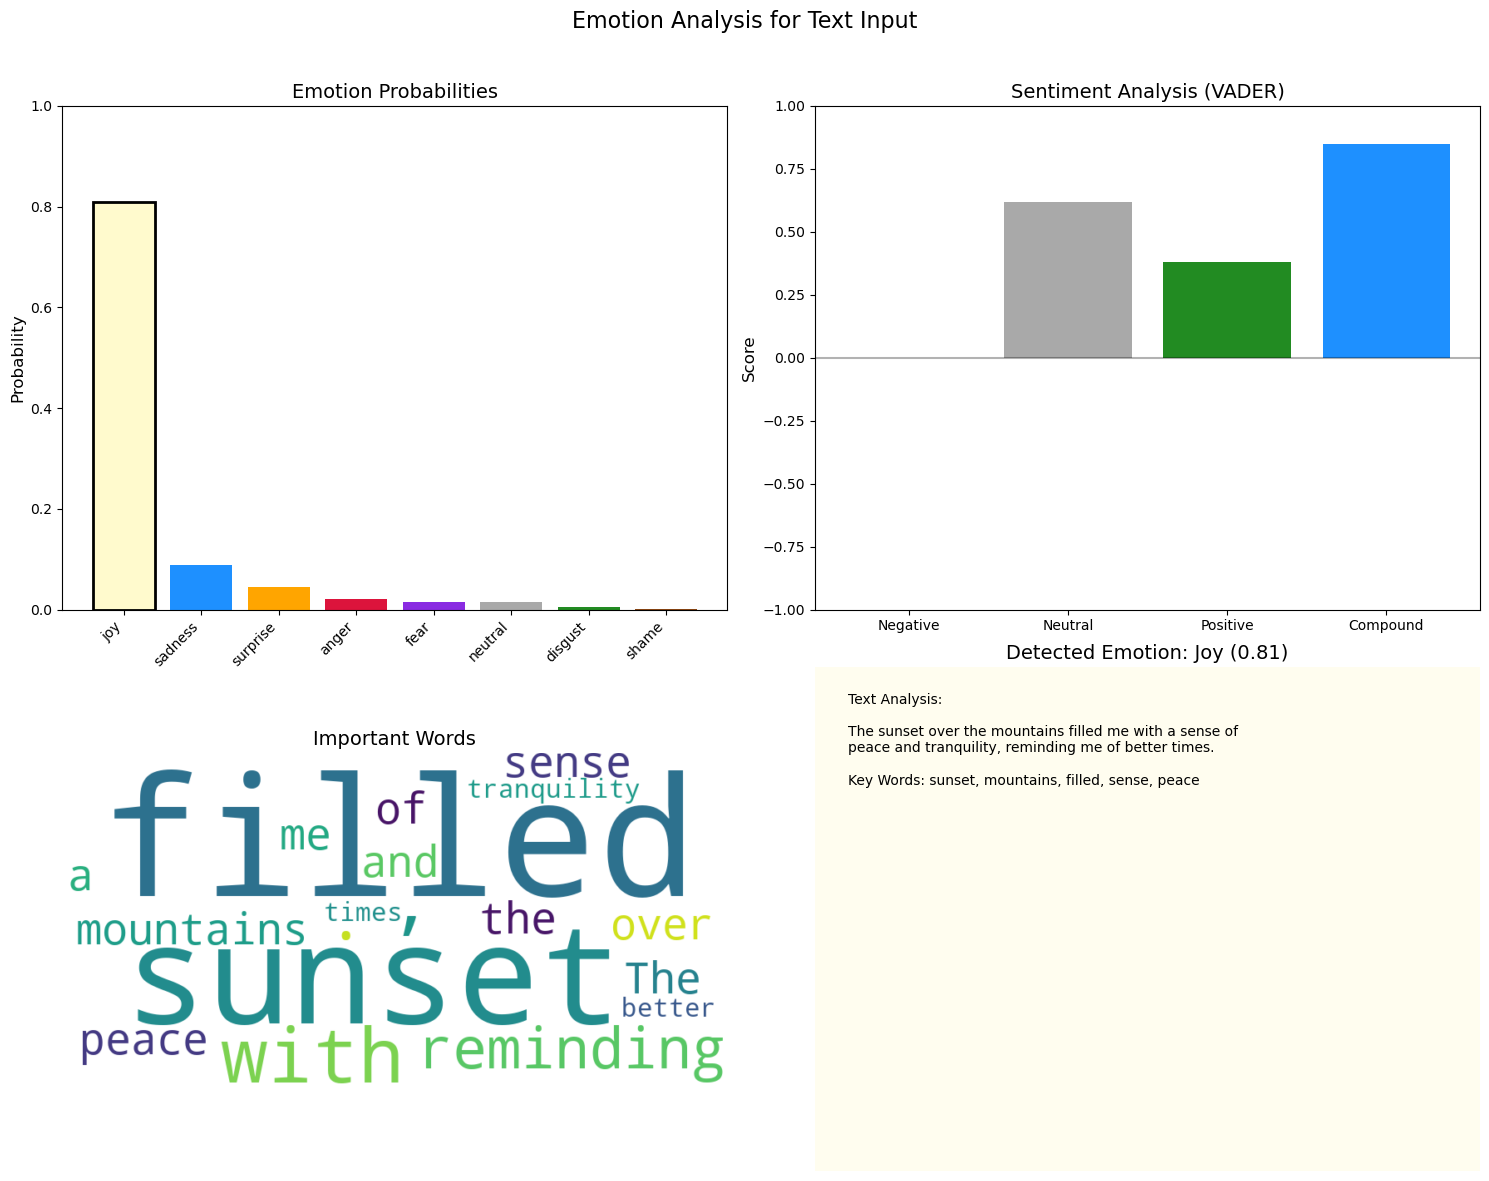

In [36]:
# Create visualization
fig = analyzer.visualize_prediction(test_text)
plt.show()

## Save the Model

In [37]:
# Save the model, tokenizer, and label encoder
import os

In [38]:
# Create a directory for the model
os.makedirs('emotion_detection_model', exist_ok=True)

In [39]:
# Save the trained model
trained_model.save('emotion_detection_model/model.keras')

In [40]:
# Save the tokenizer
with open('emotion_detection_model/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [41]:
# Save the label encoder
with open('emotion_detection_model/label_encoder.pickle', 'wb') as handle:
    pickle.dump(label_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [42]:
# Save max_len
with open('emotion_detection_model/max_len.txt', 'w') as f:
    f.write(str(max_len))

In [43]:
print("Model and related components saved to 'emotion_detection_model/' directory")

Model and related components saved to 'emotion_detection_model/' directory


## Load and Use the Model

In [44]:
# Load the saved model and components
from tensorflow.keras.models import load_model

In [45]:
# Load the model
loaded_model = load_model('emotion_detection_model/model.keras')

In [46]:
# Load the tokenizer
with open('emotion_detection_model/tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

In [47]:
# Load the label encoder
with open('emotion_detection_model/label_encoder.pickle', 'rb') as handle:
    loaded_label_encoder = pickle.load(handle)

In [48]:
# Load max_len
with open('emotion_detection_model/max_len.txt', 'r') as f:
    loaded_max_len = int(f.read())

In [49]:
# Create a new analyzer with loaded components
loaded_analyzer = EmotionAnalyzer(
    model=loaded_model,
    tokenizer=loaded_tokenizer,
    max_len=loaded_max_len,
    label_encoder=loaded_label_encoder,
    preprocessing_func=advanced_text_preprocessing
)

In [50]:
# Test with a new text
new_text = "I'm so excited about getting the promotion I've been working towards for years!"
result = loaded_analyzer.predict_and_explain(new_text)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Emotion Analysis for: 'I'm so excited about getting the promotion I've been working towards for years!'

Primary Emotion: JOY (Confidence: 0.78)

Top Emotions Detected:
- Joy: 0.78
- Surprise: 0.15
- Sadness: 0.05

Sentiment Analysis:
- Positive: 0.20
- Neutral: 0.80
- Negative: 0.00
- Overall (Compound): 0.46

Key Phrases:
- I
- the promotion
- I
- years

Named Entities:
- years (DATE)

Emotional Keywords:
- excited
- getting
- promotion
- working
- years

Summary:
The text expresses positive sentiments and happiness.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


C:\Users\Sandra Tang\AppData\Local\Temp\ipykernel_11060\776958998.py:177: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(emotion_names, rotation=45, ha='right')


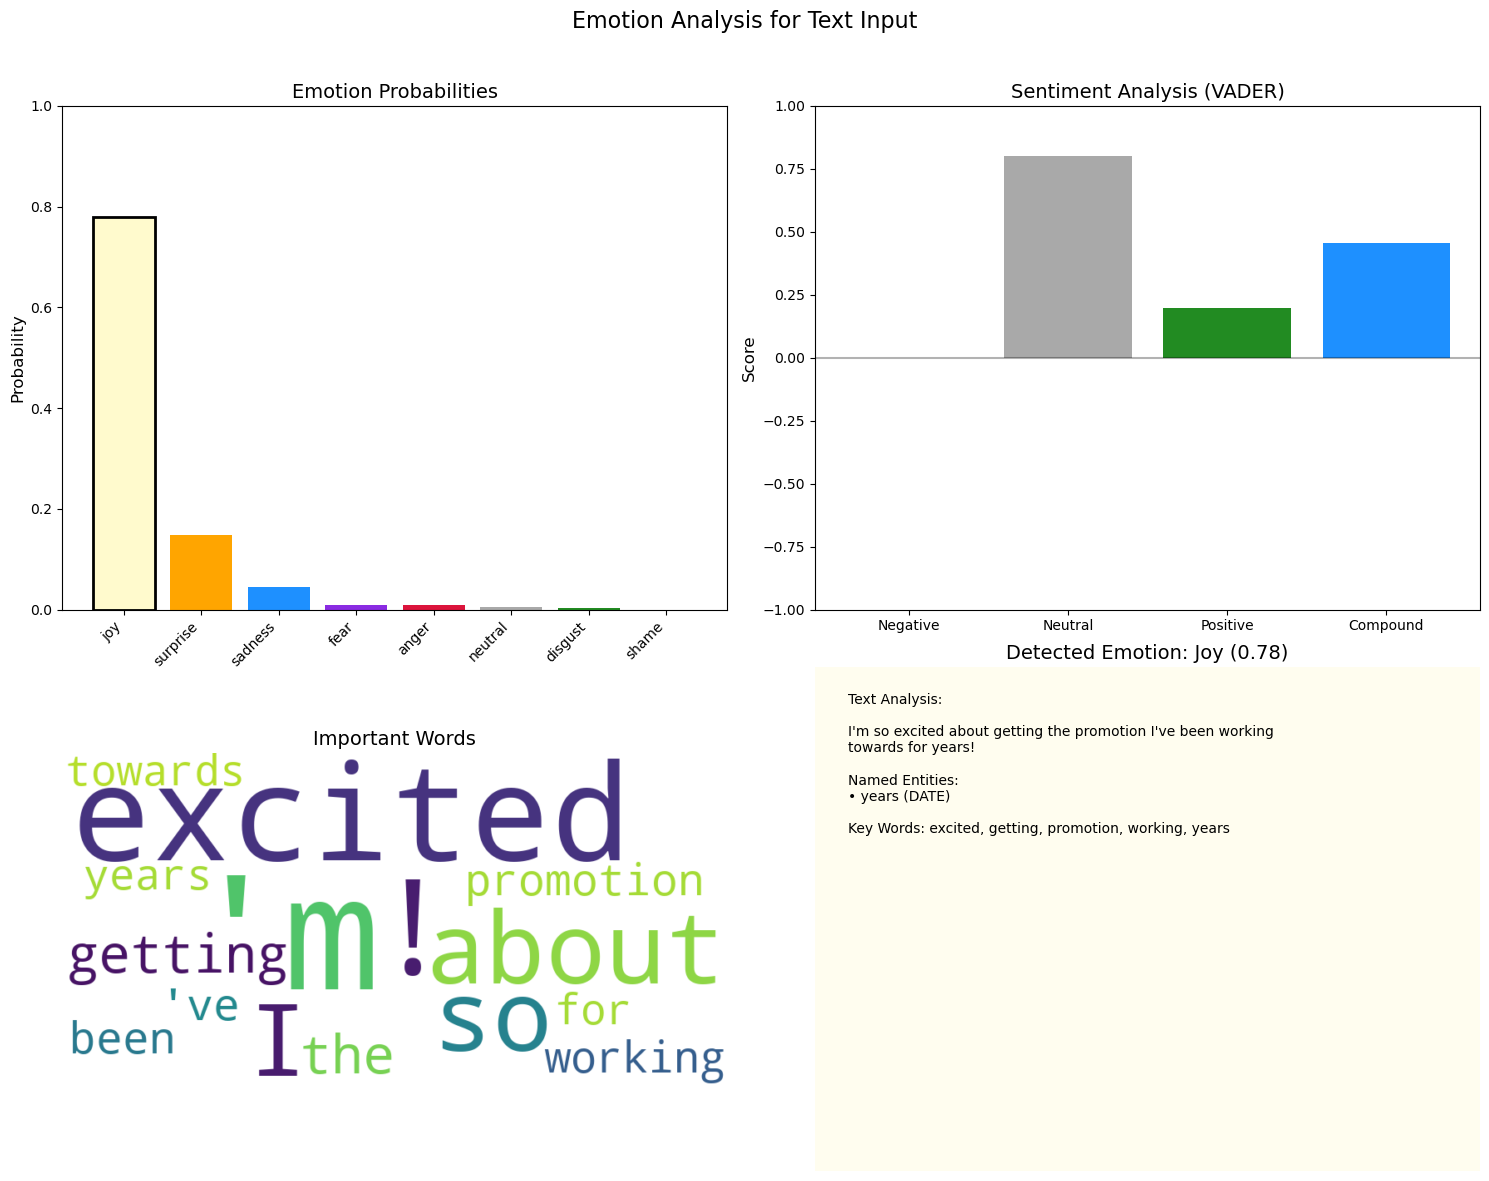

In [51]:
# Create visualization
loaded_analyzer.visualize_prediction(new_text)
plt.show()

## Demo for multiple texts 

In [52]:
# Function to analyze multiple texts
def analyze_multiple_texts(analyzer, texts):
    """Analyze multiple texts and display results"""
    for i, text in enumerate(texts):
        print(f"\n=== Text {i+1} ===")
        print(f"Text: {text}")
        
        # Get prediction
        prediction = analyzer.predict_emotion(text)
        print(f"Predicted emotion: {prediction['predicted_emotion']} (Confidence: {prediction['confidence']:.2f})")
        
        # Create visualization
        fig = analyzer.visualize_prediction(text)
        plt.show()


=== Text 1 ===
Text: I'm really disappointed with the service at this restaurant.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted emotion: sadness (Confidence: 0.79)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


C:\Users\Sandra Tang\AppData\Local\Temp\ipykernel_11060\776958998.py:177: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(emotion_names, rotation=45, ha='right')


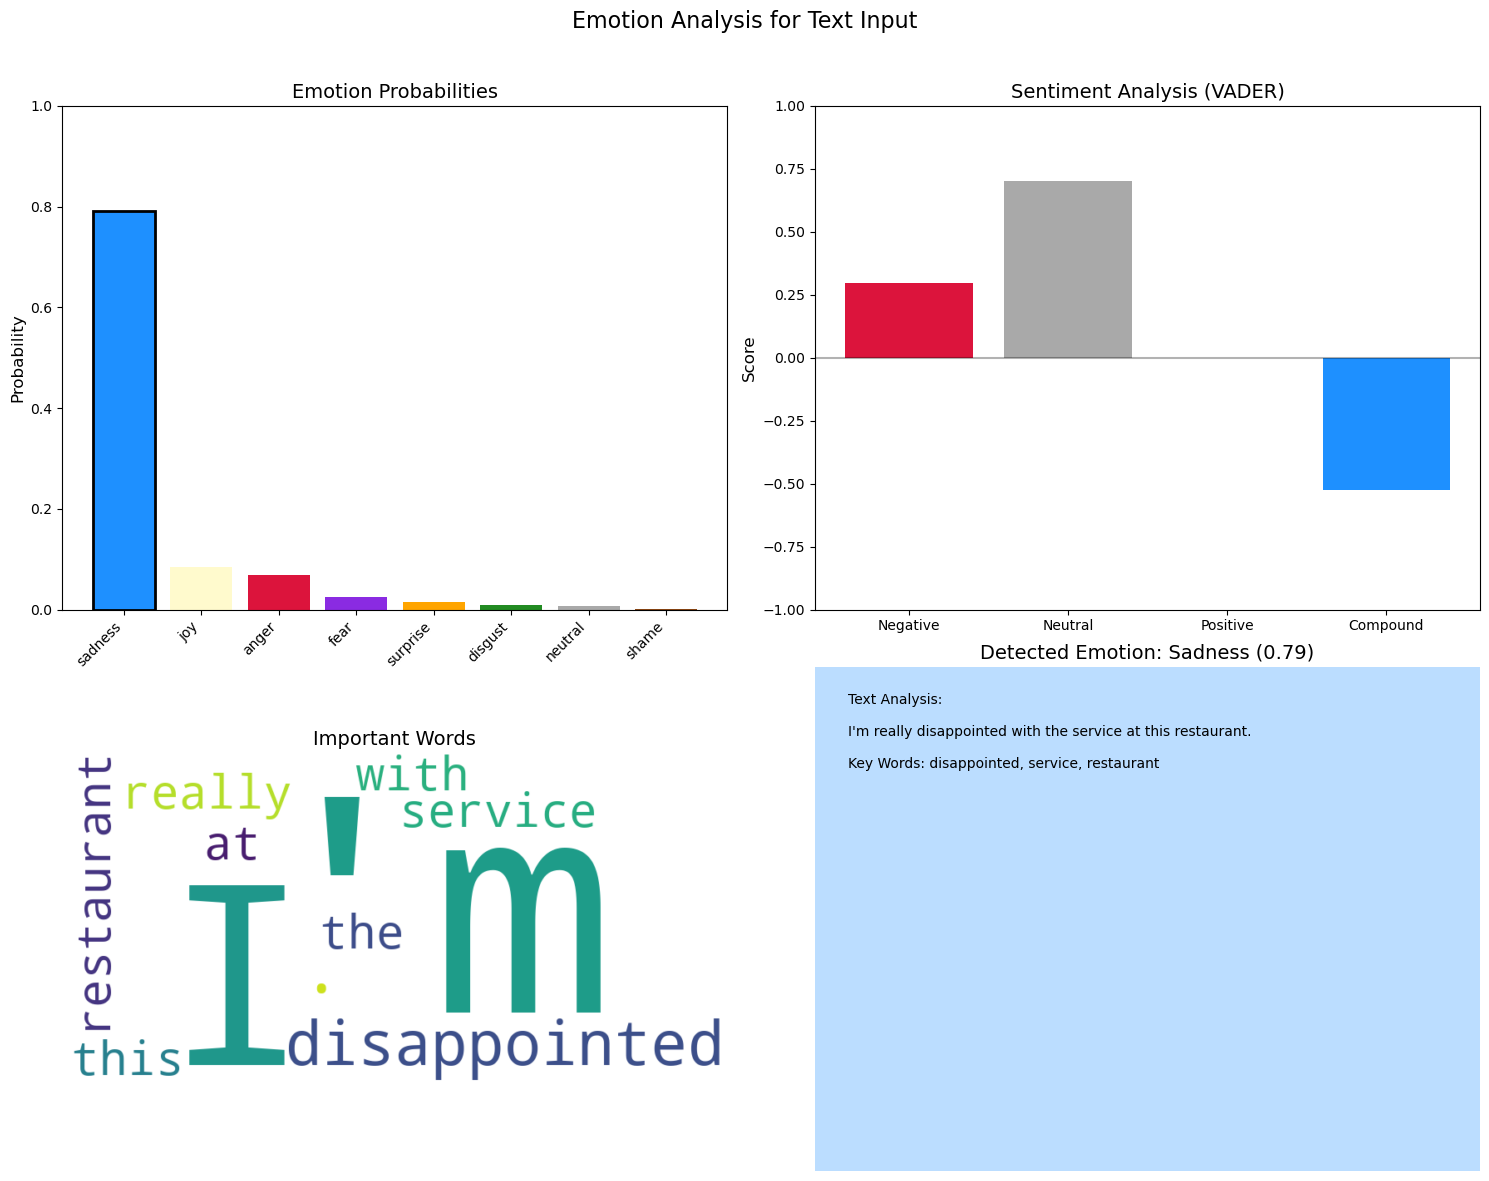


=== Text 2 ===
Text: The surprise party they threw for me was amazing!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted emotion: surprise (Confidence: 0.84)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


C:\Users\Sandra Tang\AppData\Local\Temp\ipykernel_11060\776958998.py:177: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(emotion_names, rotation=45, ha='right')


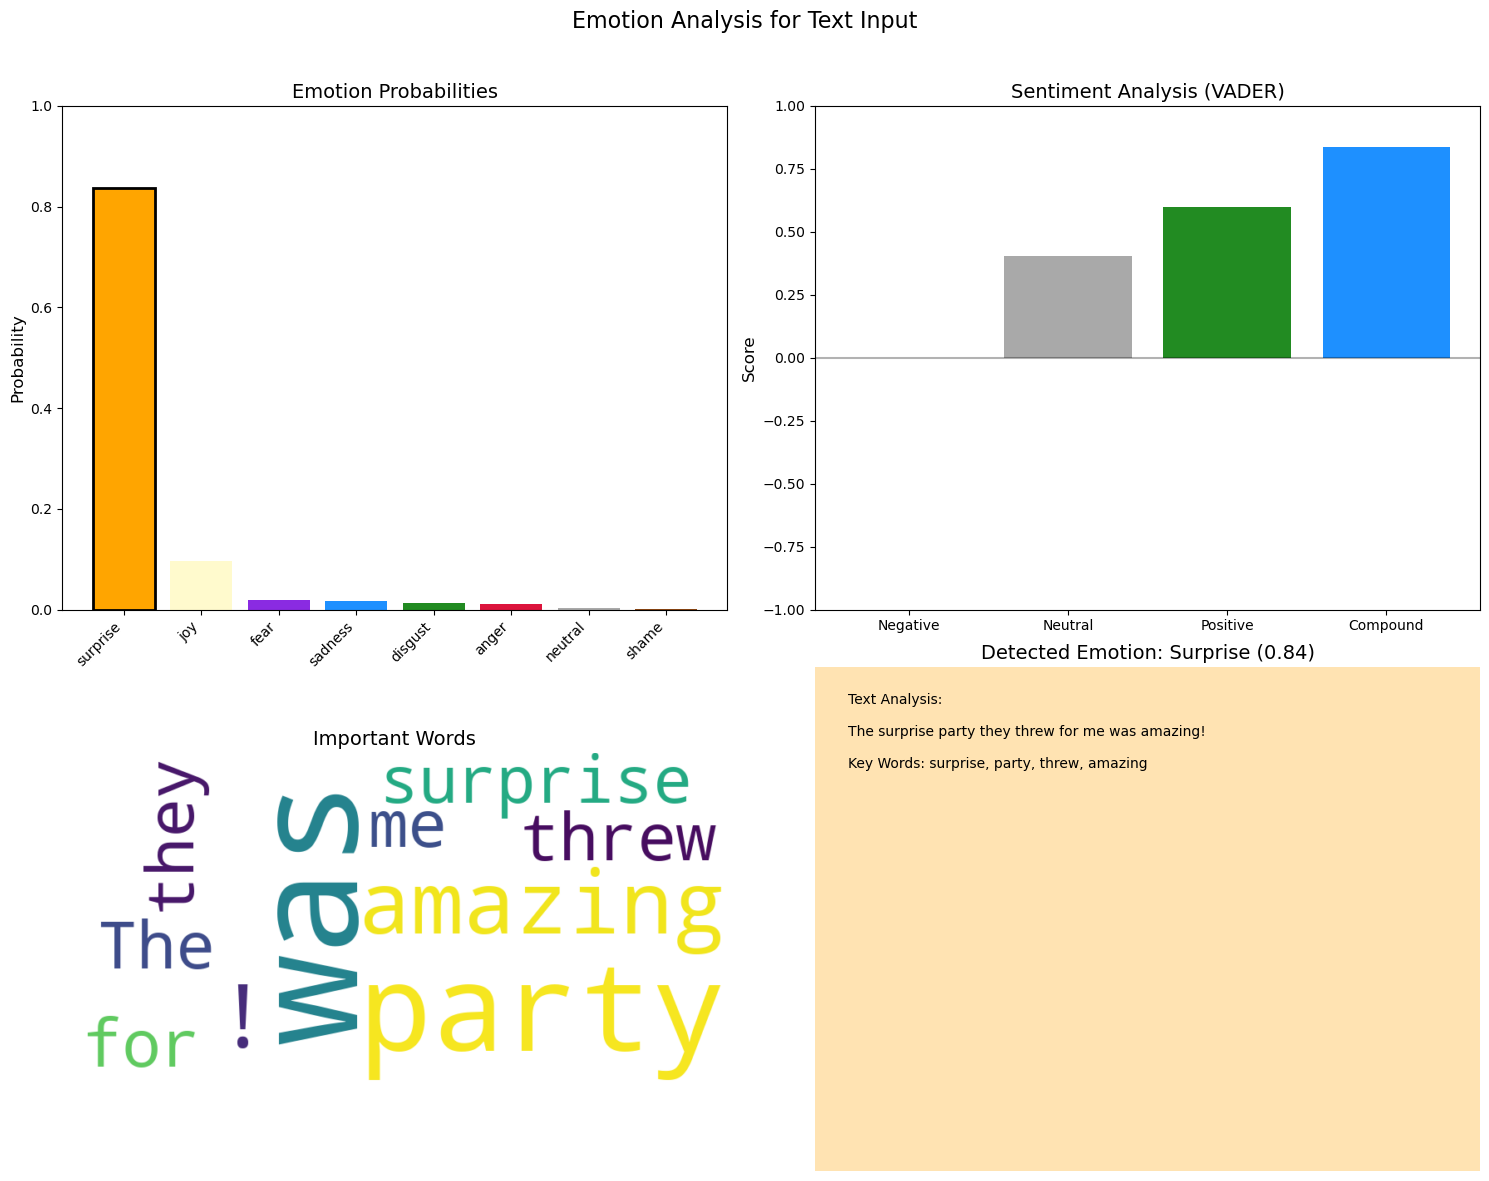


=== Text 3 ===
Text: The horror movie made me jump out of my seat several times.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted emotion: fear (Confidence: 0.77)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


C:\Users\Sandra Tang\AppData\Local\Temp\ipykernel_11060\776958998.py:177: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(emotion_names, rotation=45, ha='right')


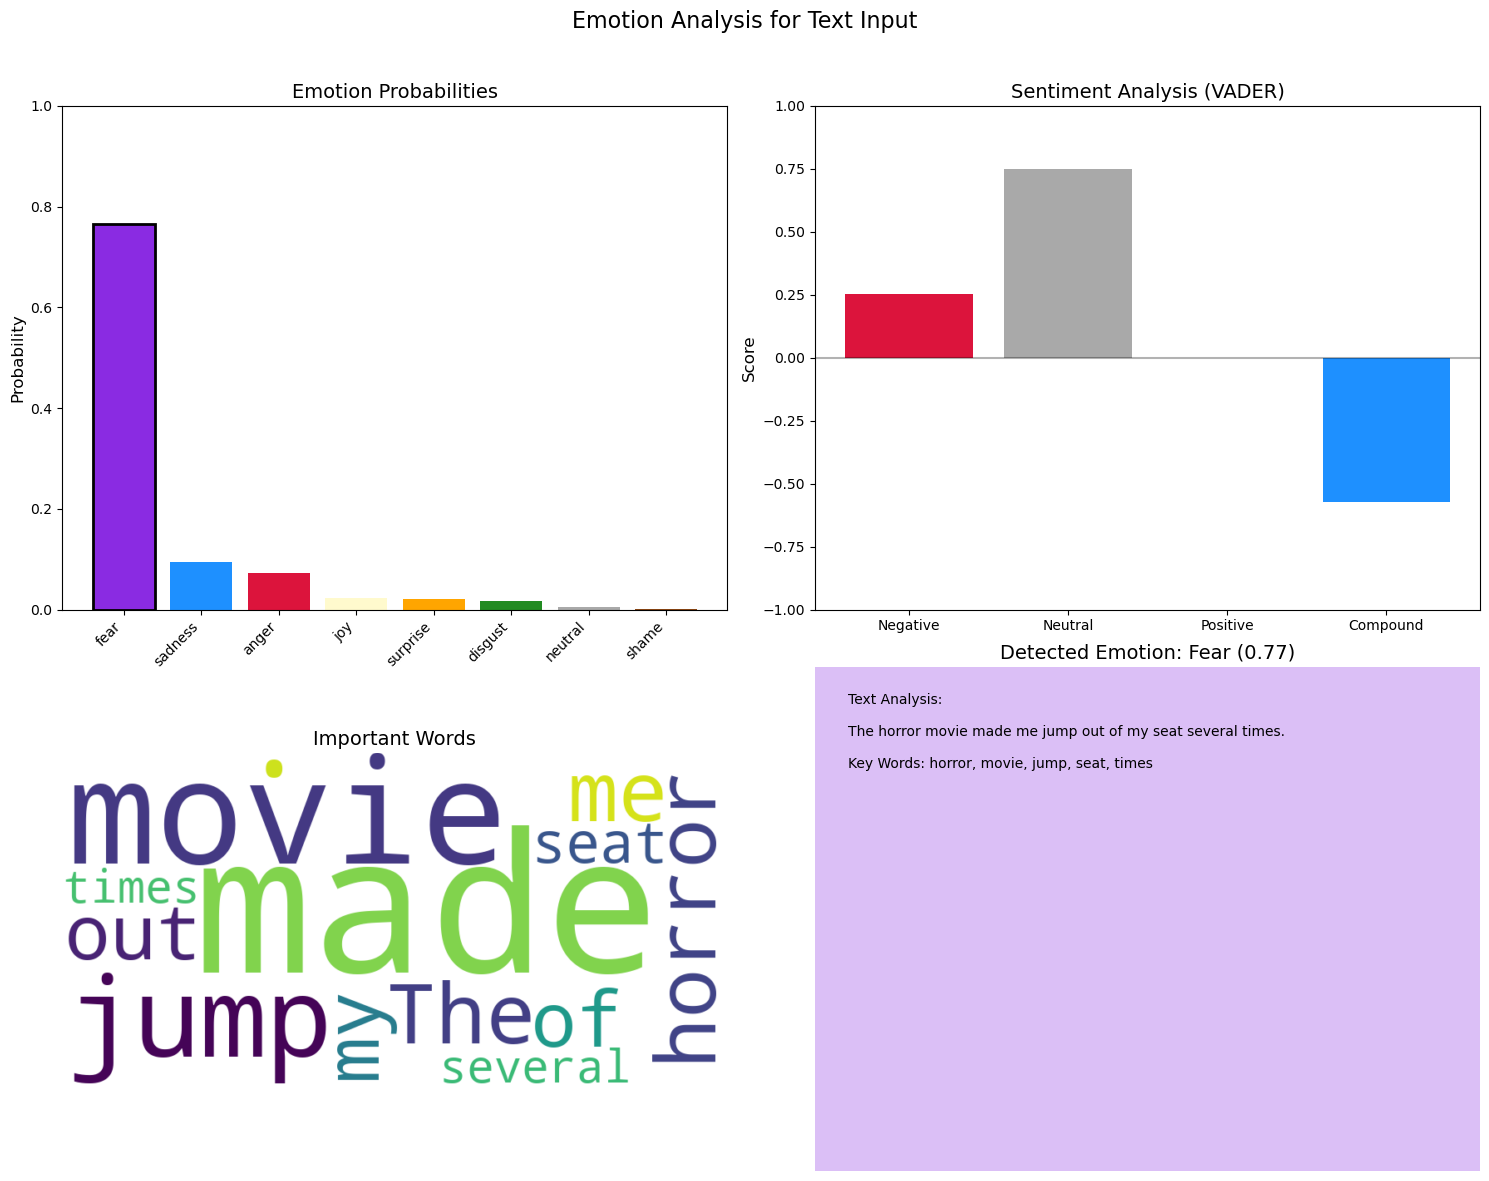


=== Text 4 ===
Text: I don't really care one way or the other about the new policy.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted emotion: sadness (Confidence: 0.35)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


C:\Users\Sandra Tang\AppData\Local\Temp\ipykernel_11060\776958998.py:177: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(emotion_names, rotation=45, ha='right')


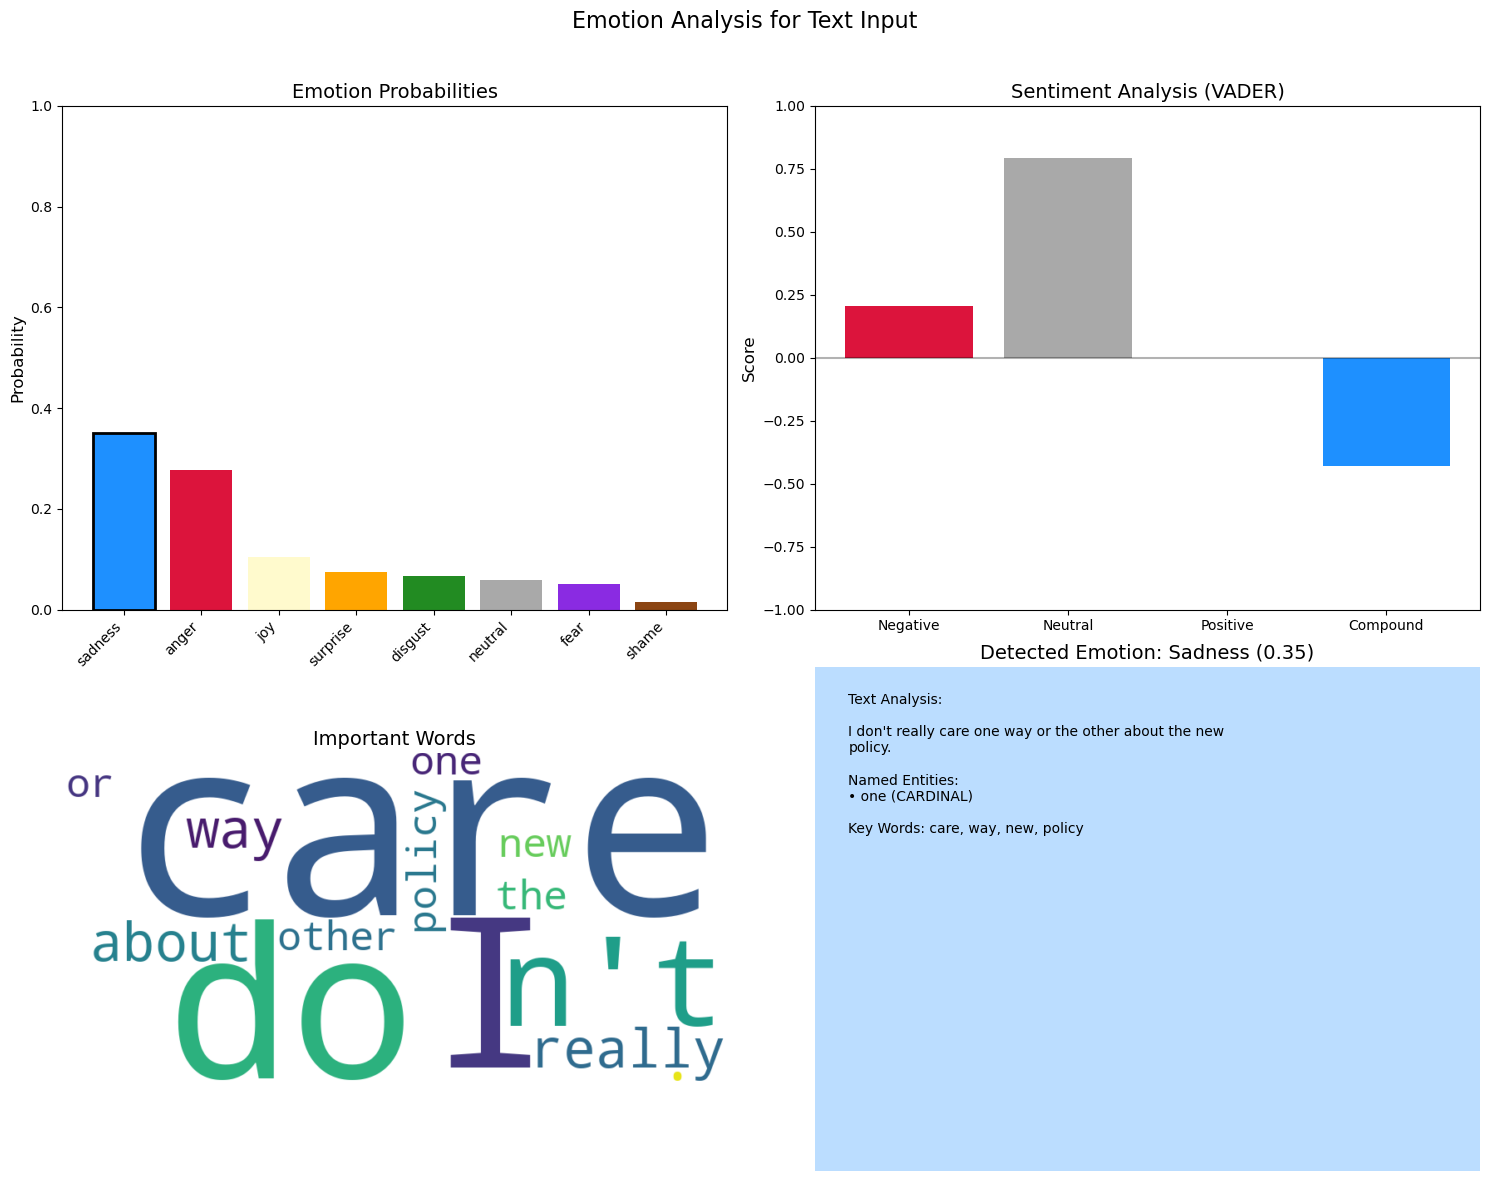

In [53]:
# Test with multiple texts
test_texts = [
    "I'm really disappointed with the service at this restaurant.",
    "The surprise party they threw for me was amazing!",
    "The horror movie made me jump out of my seat several times.",
    "I don't really care one way or the other about the new policy."
]

analyze_multiple_texts(analyzer, test_texts)